In [2]:
import pynurex as nurex
import matplotlib.pyplot as plt
import numpy as np

## Loading Densities from file

In [23]:
## 
# Method1:
#  Density can be loaded either by providing a table of density at radius
#  Array is assumed to be in format [[r_1, rho_1], [r_2, rho_2],...,[r_n, rho_n]]
#  Array can be file ie by loading from file

In [11]:
rho_data = []
with open("examples/48Ca.dat") as fr:
    for line in fr.readlines():
        r, density = line.split()
        rho_data.append( [float(r), float(density)] )
        

In [18]:
df = nurex.make_density({"type":"table","parameters":rho_data})

In [ ]:
##
# Method2:
# if file is formatted with 2 columns separated by whitespace filename can be directly provided
# Format of the file is assumed: 1st column is radius, 2nd column in density

In [19]:
df2 = nurex.make_density({"type":"File","parameters":"examples/48Ca.dat"})

In [ ]:
# now df and df2 are equivalent densities

In [20]:
radii = np.arange(0,8,0.1)  # radius array from 0 to 8
rho = [df.density(r) for r in radii]  # densities to r
rho2 = [df2.density(r) for r in radii]  # densities to r

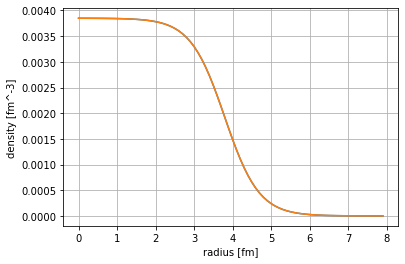

In [21]:
plt.figure()
plt.plot(radii,rho)
plt.plot(radii,rho2)
plt.grid()
plt.xlabel("radius [fm]")
plt.ylabel("density [fm^-3]")
plt.show()

## Model Configuration with Densities from file

### using filename

In [24]:
model_config = {"model":"OLAZR_FM",
                  "target":"12C",
                  "projectile":{
                  "nucleus":"48Ca",
                  "proton_density":{"type":"file", "parameters":"examples/48Ca.dat"},
                  "neutron_density":{"type":"file", "parameters":"examples/48Ca.dat"}
                  },
                "charge_changing_correction":"evaporation",
                "level_density":"GC_GEM"
                  }

In [25]:
gm = nurex.make_model(model_config)

In [35]:
energies = np.arange(100,900,20)
cccs = nurex.sigma_cc(gm, energies)
#cccs

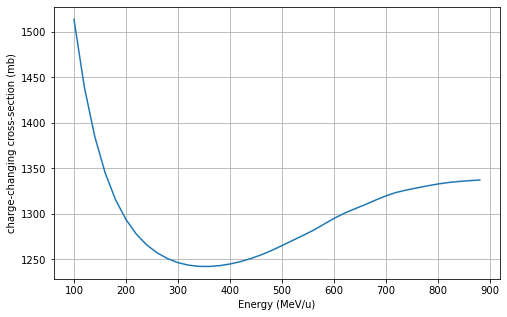

In [34]:
plt.figure(figsize=(8,5))
plt.plot(energies, cccs)
plt.xlabel("Energy (MeV/u)")
plt.ylabel("charge-changing cross-section (mb)")
plt.grid()
plt.show()

### using denisty table

In [36]:
model_config = {"model":"OLAZR_FM",
                  "target":"12C",
                  "projectile":{
                  "nucleus":"48Ca",
                  "proton_density":{"type":"table", "parameters":rho_data},
                  "neutron_density":{"type":"table", "parameters":rho_data}
                  },
                "charge_changing_correction":"evaporation",
                "level_density":"GC_GEM"
                  }

In [37]:
gm = nurex.make_model(model_config)

In [38]:
cccs = nurex.sigma_cc(gm, 300)

In [39]:
cccs

1246.5181864326366